In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt


from neuron_population import NeuronPopulation
from connectome import Connectome
from overhead import Simulation

In [3]:
dt = 0.1

## Simple test

In [4]:
# Neuron population parameters
layer_distribution = [400, 400]
n_layers = 2
neuron_types = ["p23", "TRN", "b", "nb"]
n_neuron_types = len(neuron_types)
inhibitory = [False, False, True, True]
dist_layer1 = np.array([60, 20, 10, 10])
dist_layer2 = np.array([40, 40, 10, 10])
neuron_distribution = [dist_layer1, dist_layer2]
threshold_decay = np.exp(-dt / 5)
layer_distances = np.zeros((n_layers, n_layers))
# mm
layer_distances[0, 0] = 0.6
layer_distances[1, 1] = 0.6
layer_distances[0, 1] = 5.0
layer_distances[1, 0] = 5.0

In [5]:
neuron_pop = NeuronPopulation(
    layer_distribution,
    neuron_distribution,
    layer_distances,
    neuron_types,
    inhibitory,
    threshold_decay,
    threshold_mult=1.15
)

In [6]:
# Connectome
max_synapses = 400
synapse_strength = np.ones((n_layers, n_layers))
# neuron_types = ["p23", "TRN", "b", "nb"]
connectivity_probability = np.zeros((n_layers, n_layers, n_neuron_types, n_neuron_types))
connectivity_probability[0, 0, 0, 0] = 60
connectivity_probability[0, 0, 1, 0] = 1
connectivity_probability[0, 0, 2, 0] = 9
connectivity_probability[0, 0, 3, 0] = 5

connectivity_probability[0, 0, 0, 0] = 60
connectivity_probability[0, 0, 0, 1] = 1
connectivity_probability[0, 0, 0, 2] = 9
connectivity_probability[0, 0, 0, 3] = 5

connectivity_probability[1, 1, 0, 0] = 60
connectivity_probability[1, 1, 1, 0] = 1
connectivity_probability[1, 1, 2, 0] = 9
connectivity_probability[1, 1, 3, 0] = 5

connectivity_probability[1, 1, 0, 0] = 60
connectivity_probability[1, 1, 0, 1] = 1
connectivity_probability[1, 1, 0, 2] = 9
connectivity_probability[1, 1, 0, 3] = 5

In [7]:
neuron_pop.type_from_neuron_index(0)


np.str_('p23')

In [8]:
connectome = Connectome(
    max_synapses,
    neuron_pop,
    connectivity_probability,
    synapse_strength,
)

In [9]:
sim = Simulation(connectome, dt, stepper_type="adapt")

In [10]:
# I_ext = 100

# for i in range(3000):
#     sim.step(I_ext=I_ext)

# I_ext = 0

# for i in range(7000):
#     sim.step(I_ext=I_ext)

# for i in range(7000):
#     sim.step(I_ext=I_ext)

In [11]:
import cProfile
import pstats

def your_function():
    I_ext = 100

    for i in range(300):
        sim.step(I_ext=I_ext)

    # I_ext = 0

    # for i in range(7000):
    #     sim.step(I_ext=I_ext)

    # for i in range(7000):
    #     sim.step(I_ext=I_ext)
    pass

profiler = cProfile.Profile()
profiler.enable()
your_function()
profiler.disable()
stats = pstats.Stats(profiler).sort_stats('cumulative')
stats.print_stats()

         1213704 function calls (1207937 primitive calls) in 2.044 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
     79/2    0.000    0.000    2.043    1.022 {built-in method builtins.exec}
        1    0.000    0.000    2.043    2.043 C:\Users\kingt\AppData\Local\Temp\ipykernel_21120\2366370729.py:1(<module>)
        1    0.001    0.001    2.043    2.043 C:\Users\kingt\AppData\Local\Temp\ipykernel_21120\2366370729.py:4(your_function)
      300    0.009    0.000    2.043    0.007 c:\Users\kingt\Dropbox\Programming\NeuralSimV3\NeuroSimV3\python\src\overhead.py:39(step)
      300    0.040    0.000    1.006    0.003 c:\Users\kingt\Dropbox\Programming\NeuralSimV3\NeuroSimV3\python\src\plasticity.py:95(step)
      300    0.669    0.002    0.754    0.003 c:\Users\kingt\Dropbox\Programming\NeuralSimV3\NeuroSimV3\python\src\plasticity.py:63(apply_weight_changes)
      300    0.001    0.000    0.385    0.001 c:\Users\kingt\Drop

In [12]:
neuron_pop.get_types_from_layer(0)
neuron_pop.get_neurons_from_layer(0)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

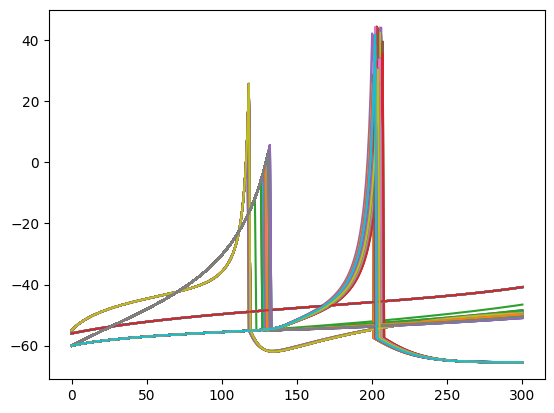

In [13]:
plt.plot(np.array(sim.stats.Vs)[:, neuron_pop.get_neurons_from_layer(1)])
plt.show()

## Cortical column

In [189]:
n_neurons = 500
max_synapses = 300
n_layers = 6

layer_percentages = [1.5, 26 + 3.1 + 4.2, 9.2 + 9.2 + 9.2 + 5.4 + 1.5, 4.8 + 1.3 + 0.6 + 0.8,
                     13.6 + 4.5 + 2 + 2, 0.5 + 0.5 + 0.1 + 0.1 + 0.5]

layer_dist = list(np.array(layer_percentages) / 100.0 * n_neurons)
# Convert elements to integers, rounding down
neurons_per_layer = [int(np.floor(x)) for x in layer_dist]
n_neurons = sum(neurons_per_layer)

In [190]:
neuron_types = ["nb1", "p23", "b", "nb", "ss4", "p4", "p5_p6", "TC", "TI", "TRN"]
n_neuron_types = len(neuron_types)
inhibitory = [True, False, True, True, False, False, False, False, True, True]

In [191]:
dist_layers = np.zeros((n_layers, n_neuron_types))
dist_layers[0, 0] = 1.0

dist_layers[1, 1] = 26.0
dist_layers[1, 2] = 3.1
dist_layers[1, 3] = 4.2

dist_layers[2, 2] = 5.4
dist_layers[2, 3] = 1.5
dist_layers[2, 4] = 9.2 + 9.2
dist_layers[2, 5] = 9.2

dist_layers[3, 6] = 4.8 + 1.3
dist_layers[3, 2] = 0.6
dist_layers[3, 3] = 0.8

dist_layers[4, 6] = 4.5
dist_layers[4, 2] = 2
dist_layers[4, 3] = 2

dist_layers[5, 7] = 1
dist_layers[5, 8] = 0.2
dist_layers[5, 9] = 0.5

In [192]:
layer_distances = np.zeros((n_layers, n_layers))
# mm
# Fill diagonal with 0.6 mm (vectorized)
layer_distances[np.diag_indices(n_layers)] = 0.3
# Fill all other elements with the difference of the index times 0.6
for i in range(n_layers):
    for j in range(n_layers):
        if i != j:
            layer_distances[i, j] = abs(i - j) * 0.6

layer_distances

array([[0.3, 0.6, 1.2, 1.8, 2.4, 3. ],
       [0.6, 0.3, 0.6, 1.2, 1.8, 2.4],
       [1.2, 0.6, 0.3, 0.6, 1.2, 1.8],
       [1.8, 1.2, 0.6, 0.3, 0.6, 1.2],
       [2.4, 1.8, 1.2, 0.6, 0.3, 0.6],
       [3. , 2.4, 1.8, 1.2, 0.6, 0.3]])

In [193]:
synapse_strength = np.ones((n_layers, n_layers))

In [194]:
threshold_decay = np.exp(-dt / 10)

neuron_pop = NeuronPopulation(
    neurons_per_layer,
    dist_layers,
    layer_distances,
    neuron_types,
    inhibitory,
    threshold_decay,
    threshold_mult=1.5
)

In [195]:
neuron_pop.n_neurons

500

In [196]:
C = np.load("connectivity_matrix.npy")

# a zero array to last dimension
connectivity_probability = np.zeros((n_layers, n_layers, n_neuron_types, n_neuron_types+2))

# Fill the connectivity probability matrix with the values from C
connectivity_probability[:,:,:,:-2] = C[:,:,:,:]

connectivity_probability[:,:,:,-2] = 1.0  # Self connections
connectivity_probability[:,:,:,-1] = 0.0  # No connections to non-existent neurons

In [197]:
connectome = Connectome(
    max_synapses,
    neuron_pop,
    connectivity_probability,
    synapse_strength,
)

In [198]:
sim = Simulation(connectome, dt, stepper_type="adapt")

In [199]:
# import cProfile
# import pstats

# def your_function():
#     I_ext = 30
#     for i in range(100):
#         sim.step(I_ext=I_ext)
#     pass

# profiler = cProfile.Profile()
# profiler.enable()
# your_function()
# profiler.disable()
# stats = pstats.Stats(profiler).sort_stats('cumulative')
# stats.print_stats()

In [200]:
I_ext = 100

for i in range(500):
    sim.step(I_ext=I_ext)

I_ext = 0

for i in range(1500):
    sim.step(I_ext=I_ext)

c:\Users\kingt\Dropbox\Programming\NeuralSimV3\NeuroSimV3\python\src\izhikevich.py:115: RuntimeWarning: overflow encountered in exp
  spike_prob = dt * np.exp((self.V - eff_threshold) / self.delta_V)


KeyboardInterrupt: 

In [ ]:
neuron_pop.get_types_from_layer(0)
neuron_pop.get_neurons_from_layer(0)

array([0, 1, 2, 3, 4, 5, 6])

In [ ]:
np.array(sim.stats.Vs).shape

(2001, 500)

In [ ]:
neuron_pop.get_neurons_from_layer(0).shape

(7,)

In [ ]:
np.array(sim.stats.Vs)[:, neuron_pop.get_neurons_from_layer(0)].shape

(2001, 7)

In [ ]:
np.array(sim.stats.spikes).shape

spikes_sum = np.sum(np.array(sim.stats.spikes), axis=0)
spikes_sum.shape

(500,)

In [ ]:
spiker = np.argmax(spikes_sum)
neuron_pop.type_from_neuron_index(spiker)
# neuron_pop.get_layer(spiker)
# spikes_sum[spiker]

np.str_('ss4')

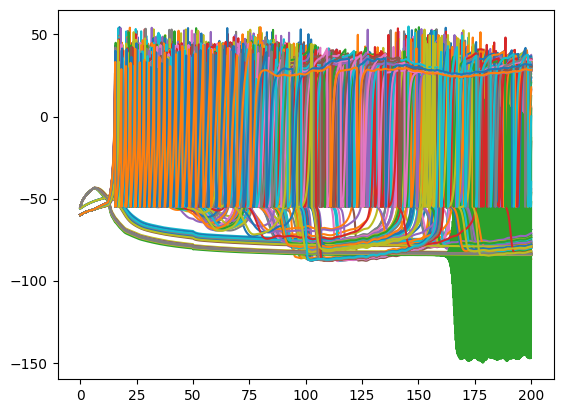

In [ ]:
plt.plot(sim.stats.ts, np.array(sim.stats.Vs)[:, neuron_pop.get_neurons_from_layer(2)])
# plt.plot(sim.stats.ts, np.array(sim.stats.Vs)[:,spiker])
plt.show()